In [19]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = 'Yx5sZi3HBIraX7Gk9iGJ1Dlpe'
consumer_secret = 'OE57ISxhIYngM9fauWiiV4GrQex2WwN7qDKMYfG785cXzQl6Yh'
access_token = '139466009-kpdYEukDcZU9dd3cFmdVGjLVOv0nX1tCyt4vsOWO'
access_token_secret = 'F9nnaiRVToZ3lzJfhSBIxjDizrZZtWyFeoIodWkrrd8Wt'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [59]:
# Target Search Term
#target_terms = ("Exxon Mobil", "Chevron", "ConocoPhillips", "Occidental Petroleum", "EOG Resources", "@OPC")
target_terms = ("@OPECnews", "@Shell")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiments = []

# Loop through all target users
for target in target_terms:
    
    # Defining a counter
    counter = 1

    # Loop through 2 times (total of 100 tweets excludes missing 'Username')
    for x in range(20):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")
        #print(public_tweets)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            
            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                    tweet["user"]["statuses_count"] > min_tweets and
                    tweet["user"]["statuses_count"] < max_tweets and
                    tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                tweets_ago = counter
            
                # Store all the sentiments
                try:
                    sentiments.append({"Source Account": tweet['entities']['user_mentions'][0]['name'],
                                       "Media Sources": target,
                                       "Date": tweet["created_at"],
                                       "Tweet Polarity": compound,
                                       "Positive": pos,
                                       "Neutral": neu,
                                       "Negative": neg,
                                       "Tweets Ago": counter})
                except:
                    continue

                # Add to counter 
                counter = counter + 1
                if counter > 1000:
                    break

In [67]:
sentiments_pd = pd.DataFrame(sentiments)
sentiments_pd.head()
len(sentiments_pd)
Opecnews = sentiments_pd[sentiments_pd['Media Sources'] == "@OPECnews"]
Shell = sentiments_pd[sentiments_pd['Media Sources'] == "@Shell"]
len(Opecnews), len(Shell)
#Opecnews['Negative'].mean()
#Shell['Negative'].mean()
#Opecnews
Opecnews
len(sentiments_pd)

860

In [68]:
sentiments_pd.to_csv("/Users/manoranjanpemmaka/Downloads/Oil Company Tweet Data.csv")

In [61]:
sentiments_pd['Negative'].mean()

0.04058139534883718

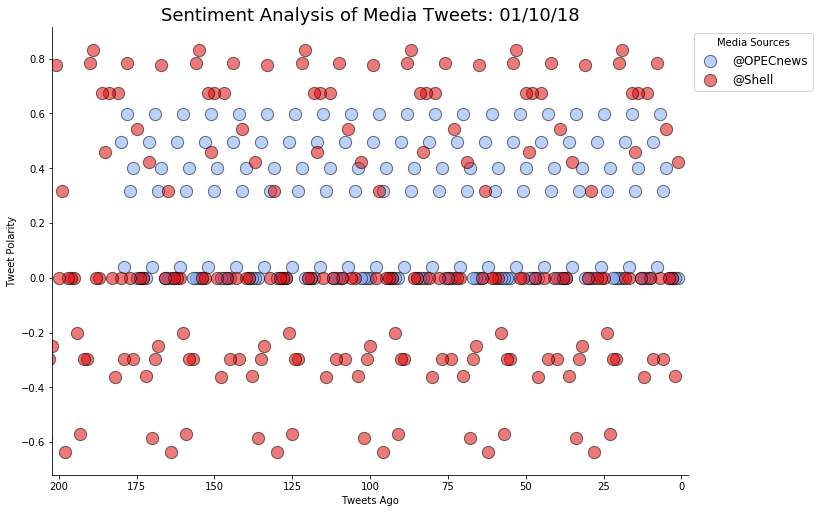

In [64]:
#create lmplot using seasborn

#set colorlist for charts
#clrlist = ["#82acf9", "#0f55aa", "#e00b0b", "#1010e5", "#eaea0b", "#eaea0a"]
clrlist = ["#82acf9", "#e00b0b"]

#sns.set_palette(clrlist)
sns.color_palette(clrlist)

#create chart
MediaTweetAnalysis = sns.lmplot(x="Tweets Ago", y="Tweet Polarity", data=sentiments_pd, 
           hue="Media Sources", size=7, aspect=1.4,
           legend_out=False, legend=True, 
           scatter_kws={"s":150, 'alpha':.55, 'edgecolors':"black", 'linewidth':1}, 
                                fit_reg=False, palette=clrlist)
plt.xlim(202,-2)
plt.title("Sentiment Analysis of Media Tweets: %s" % time.strftime('%x'), fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), ncol=1, title="Media Sources", fontsize=12)
#plt.savefig("Sentiment_Analysis_of_Media_Tweets.png", bbox_inches='tight')
plt.show(MediaTweetAnalysis)